In [1]:
import pandas as pd 
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt

# Data Preparation pada Data Training

In [2]:
heating_oil_train = pd.read_csv('HeatingOil-Training.csv')
heating_oil_train

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size
0,6,74,132,4,23.8,4
1,10,43,263,4,56.7,4
2,3,81,145,2,28.0,6
3,9,50,196,4,45.1,3
4,2,80,131,5,20.8,2
...,...,...,...,...,...,...
1213,7,56,264,5,58.2,5
1214,5,78,129,1,22.5,1
1215,5,77,138,3,26.8,1
1216,3,89,156,2,34.0,2


In [3]:
heating_oil_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Insulation     1218 non-null   int64  
 1   Temperature    1218 non-null   int64  
 2   Heating_Oil    1218 non-null   int64  
 3   Num_Occupants  1218 non-null   int64  
 4   Avg_Age        1218 non-null   float64
 5   Home_Size      1218 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 57.2 KB


In [4]:
heating_oil_train.isna().sum()

Insulation       0
Temperature      0
Heating_Oil      0
Num_Occupants    0
Avg_Age          0
Home_Size        0
dtype: int64

# Exploratory Visualization

<AxesSubplot:>

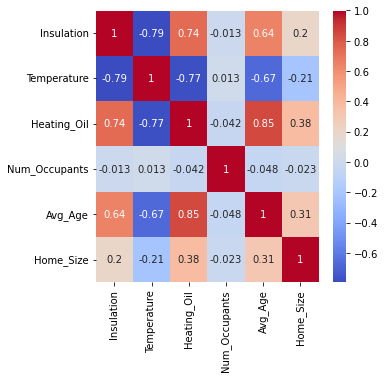

In [5]:
plt.figure(figsize = (5,5)) 
sns.heatmap( heating_oil_train.corr(), annot=True, cmap='coolwarm' )

In [6]:
heating_oil_train = heating_oil_train.drop(columns='Num_Occupants')
heating_oil_train

,Insulation,Temperature,Heating_Oil,Avg_Age,Home_Size
0,6,74,132,23.8,4
1,10,43,263,56.7,4
2,3,81,145,28.0,6
3,9,50,196,45.1,3
4,2,80,131,20.8,2
...,...,...,...,...,...
1213,7,56,264,58.2,5
1214,5,78,129,22.5,1
1215,5,77,138,26.8,1
1216,3,89,156,34.0,2


# Data Scoring

* Data HeatingOil-Scoring sebagai data klien baru yang akan dicari prediksi heating oil
* Data HeatingOil-Training sebagai data training

In [7]:
heating_oil_scoring = pd.read_csv('HeatingOil-Scoring.csv')
heating_oil_scoring

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size
0,5,69,10,70.1,7
1,5,80,1,66.7,1
2,4,89,9,67.8,7
3,7,81,9,52.4,6
4,4,58,8,22.9,7
...,...,...,...,...,...
42645,7,63,9,59.1,8
42646,7,84,1,43.6,5
42647,2,67,1,27.3,4
42648,8,58,1,65.7,3


# Data Preparation

In [8]:
heating_oil_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42650 entries, 0 to 42649
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Insulation     42650 non-null  int64  
 1   Temperature    42650 non-null  int64  
 2   Num_Occupants  42650 non-null  int64  
 3   Avg_Age        42650 non-null  float64
 4   Home_Size      42650 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 1.6 MB


In [9]:
heating_oil_scoring.isna().sum()

Insulation       0
Temperature      0
Num_Occupants    0
Avg_Age          0
Home_Size        0
dtype: int64

In [10]:
heating_oil_train.describe()

,Insulation,Temperature,Heating_Oil,Avg_Age,Home_Size
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,6.214286,65.078818,197.394089,42.706404,4.649425
std,2.768094,16.932425,56.248267,15.051137,2.321226
min,2.000000,38.000000,114.000000,15.100000,1.000000
25%,4.000000,49.000000,148.250000,29.700000,3.000000
50%,6.000000,60.000000,185.000000,42.900000,5.000000
75%,9.000000,81.000000,253.000000,55.600000,7.000000
max,10.000000,90.000000,301.000000,72.200000,8.000000


In [11]:
heating_oil_scoring.describe()

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size
count,42650.000000,42650.000000,42650.000000,42650.000000,42650.000000
mean,5.989004,63.962087,5.489285,44.040131,4.495193
std,2.575511,15.313351,2.874612,16.736901,2.290911
min,2.000000,38.000000,1.000000,15.000000,1.000000
25%,4.000000,51.000000,3.000000,29.500000,3.000000
50%,6.000000,64.000000,5.000000,44.100000,4.000000
75%,8.000000,77.000000,8.000000,58.600000,6.000000
max,10.000000,90.000000,10.000000,73.000000,8.000000


In [12]:
heating_oil_scoring = heating_oil_scoring.drop(columns='Num_Occupants')
heating_oil_scoring

,Insulation,Temperature,Avg_Age,Home_Size
0,5,69,70.1,7
1,5,80,66.7,1
2,4,89,67.8,7
3,7,81,52.4,6
4,4,58,22.9,7
...,...,...,...,...
42645,7,63,59.1,8
42646,7,84,43.6,5
42647,2,67,27.3,4
42648,8,58,65.7,3


In [13]:
X_pred = heating_oil_scoring[
    (heating_oil_scoring['Avg_Age']>=15.1)&
    (heating_oil_scoring['Avg_Age']<=72.2)
]
X_pred

,Insulation,Temperature,Avg_Age,Home_Size
0,5,69,70.1,7
1,5,80,66.7,1
2,4,89,67.8,7
3,7,81,52.4,6
4,4,58,22.9,7
...,...,...,...,...
42645,7,63,59.1,8
42646,7,84,43.6,5
42647,2,67,27.3,4
42648,8,58,65.7,3


# Modelling

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
X_train = heating_oil_train.drop(columns='Heating_Oil')
y_train = heating_oil_train['Heating_Oil']

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_prediction = model.predict(X_pred)

In [18]:
heating_oil_pred = X_pred.copy(deep=True)

In [19]:
heating_oil_pred['Heating_Oil_Prediction'] = y_prediction

In [20]:
heating_oil_pred.head(10)

,Insulation,Temperature,Avg_Age,Home_Size,Heating_Oil_Prediction
0,5,69,70.1,7,251.320516
1,5,80,66.7,1,216.028317
2,4,89,67.8,7,226.086630
3,7,81,52.4,6,209.528860
4,4,58,22.9,7,164.668705
5,4,58,37.4,3,180.511874
6,6,51,51.6,3,221.188277
7,2,73,37.4,4,164.000739
8,9,39,56.9,7,264.711526
9,8,84,64.5,2,221.364173


# Evaluation

In [21]:
print('coefficients:', model.coef_)
print('intercept:', model.intercept_)

coefficients: [ 3.32303762 -0.86922093  1.96801278  3.17325415]
intercept: 134.51109695991002


y=(5 x 3.32303762)+(69 x -0.86922093)+(70.1 x 1.96801278)+(7 x 3.17325415)+134.51109695991002

# Deployment

In [22]:
heating_oil_pred['Heating_Oil_Prediction'].mean()

199.04113829032107

In [23]:
heating_oil_pred['Heating_Oil_Prediction'].sum()

8368087.536001605